In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('C:/Users/HP/Social_Network_Ads.csv')

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0
...,...,...,...,...,...
395,15691863,Female,46.0,41000.0,1
396,15706071,Male,51.0,23000.0,1
397,15654296,Female,50.0,20000.0,1
398,15755018,Male,36.0,33000.0,0


In [5]:
df.shape

(400, 5)

In [6]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [7]:
df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
df.drop('User ID', inplace=True ,axis=1)

In [9]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19.0,19000.0,0
1,Male,35.0,20000.0,0
2,Female,26.0,43000.0,0
3,Female,27.0,57000.0,0
4,Male,19.0,76000.0,0
...,...,...,...,...
395,Female,46.0,41000.0,1
396,Male,51.0,23000.0,1
397,Female,50.0,20000.0,1
398,Male,36.0,33000.0,0


In [10]:
df2=pd.get_dummies(df)

In [11]:
df2

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1
...,...,...,...,...,...
395,46.0,41000.0,1,1,0
396,51.0,23000.0,1,0,1
397,50.0,20000.0,1,1,0
398,36.0,33000.0,0,0,1


In [12]:
df2.columns

Index(['Age', 'EstimatedSalary', 'Purchased', 'Gender_Female', 'Gender_Male'], dtype='object')

In [13]:
df2.shape

(400, 5)

In [14]:
df2.head()

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19.0,19000.0,0,0,1
1,35.0,20000.0,0,0,1
2,26.0,43000.0,0,1,0
3,27.0,57000.0,0,1,0
4,19.0,76000.0,0,0,1


In [15]:
Y=df2['Purchased']

X=df2[['Age', 'EstimatedSalary', 'Gender_Female', 'Gender_Male']]

In [16]:
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19.0,19000.0,0,1
1,35.0,20000.0,0,1
2,26.0,43000.0,1,0
3,27.0,57000.0,1,0
4,19.0,76000.0,0,1
...,...,...,...,...
395,46.0,41000.0,1,0
396,51.0,23000.0,0,1
397,50.0,20000.0,1,0
398,36.0,33000.0,0,1


In [17]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [18]:
X.shape

(400, 4)

In [19]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=12)

In [20]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(300, 4)
(100, 4)
(300,)
(100,)


In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.fit_transform(X_test)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
cls=KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
cls.fit(X_train,Y_train)

KNeighborsClassifier()

In [23]:
Y_pred=cls.predict(X_test)

In [24]:
Y_proba=cls.predict_proba(X_test)

In [25]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [26]:
print(accuracy_score(Y_test,Y_pred))

0.83


In [27]:
print(confusion_matrix(Y_test,Y_pred))

[[51 10]
 [ 7 32]]


In [28]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        61
           1       0.76      0.82      0.79        39

    accuracy                           0.83       100
   macro avg       0.82      0.83      0.82       100
weighted avg       0.83      0.83      0.83       100



In [29]:
Y_proba

array([[0. , 1. ],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0. , 1. ],
       [0.4, 0.6],
       [0. , 1. ],
       [0.2, 0.8],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [0.8, 0.2],
       [0.8, 0.2],
       [1. , 0. ],
       [0.6, 0.4],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0. , 1. ],
       [0.2, 0.8],
       [1. , 0. ],
       [0. , 1. ],
       [0. , 1. ],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [1. , 0. ],
       [1. , 0. ],
       [0.4, 0.6],
       [0.2, 0.8],
       [0.8, 0.2],
       [0. ,

In [30]:
Y_predicted=Y_proba[:,1]

In [31]:
#roc_curve nd roc_auc_score

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [32]:
#use roc_curve() to generate fpr & tpr values

fpr,tpr,threshold=roc_curve(Y_test,Y_predicted)

In [33]:
#pass fpr nd tpr values to 


from sklearn.metrics import auc
roc_auc=auc(fpr,tpr)
print("Area under curve for first model",roc_auc)

Area under curve for first model 0.8959646910466583


Text(0, 0.5, 'True positive rate (Sensitivity)')

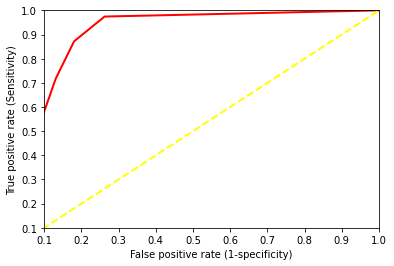

In [34]:
#plotting roc curve

plt.figure()
plt.plot(fpr,tpr,color='red',lw=2,label="ROC curve(area under curve=0.2%f)"%roc_auc)

plt.plot([0,1],[0,1],color='yellow',lw=2,linestyle='--')
plt.xlim([0.1,1.0])
plt.ylim([0.1,1.0])
plt.xlabel('False positive rate (1-specificity)')
plt.ylabel('True positive rate (Sensitivity)')